# Outlier Detection and Removal

Outliers are data points that differ significantly from other observations in a dataset. They can arise due to variability in data or measurement errors and may negatively impact the performance of statistical analyses and machine learning models.

#### Detection of Outliers
Outliers can be detected using visualization techniques and statistical methods:

1. **Boxplot**  
   - A boxplot visually represents the distribution of data and identifies outliers as points outside the "whiskers."  
   - Points below the lower whisker or above the upper whisker are potential outliers.

2. **Histogram**  
   - A histogram shows the frequency distribution of data.  
   - Outliers can be identified as isolated bars or gaps at the extreme ends of the distribution.

3. **Scatter Plot**  
   - A scatter plot can help detect outliers by displaying relationships between two variables.  
   - Points far from the majority of data clusters might indicate outliers.

4. **Statistical Methods**  
   - Methods like Z-score or the Interquartile Range (IQR) can be used to systematically identify outliers.

#### Removal of Outliers
Once detected, outliers can be addressed or removed using these techniques:

1. **IQR (Interquartile Range) Method**  
   - Calculate the IQR, which is the difference between the 75th percentile (Q3) and the 25th percentile (Q1):  
     $IQR = Q3 - Q1$  
   - Define lower and upper bounds:  
     - Lower Bound: $Q1 - 1.5 \times IQR$  
     - Upper Bound: $Q3 + 1.5 \times IQR$  
   - Remove data points lying outside these bounds.

2. **Z-Score Method**  
   - Calculate the Z-score for each data point using the formula:  
     $Z = \frac{(x - \mu)}{\sigma}$  
     where $\mu$ is the mean and $\sigma$ is the standard deviation.  
   - Data points with Z-scores greater than a threshold (commonly 3 or -3) are considered outliers.

3. **Winsorization**  
   - Replace outliers with the nearest non-outlier values (e.g., the 5th and 95th percentiles).

4. **Capping and Flooring**  
   - Cap values above a specified maximum or floor values below a minimum.

5. **Domain-Specific Rules**  
   - Use domain knowledge to set acceptable data ranges and remove or correct outliers accordingly.

By carefully detecting and removing outliers, we can improve the reliability and accuracy of your data analysis and models.


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
loan_data = pd.read_csv('loan.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [79]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Visualizing Outliers

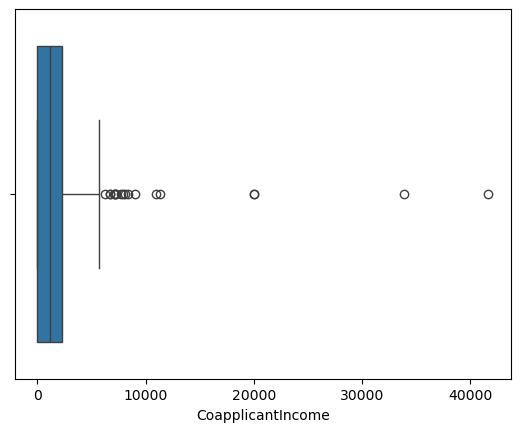

In [80]:
sns.boxplot(x='CoapplicantIncome', data=loan_data)
plt.show()

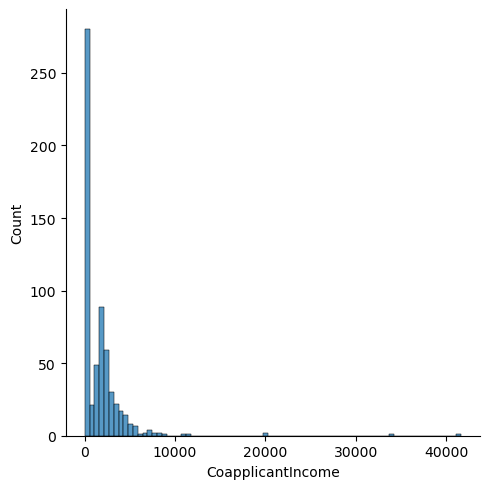

In [81]:
sns.displot(loan_data['CoapplicantIncome'])
plt.show()

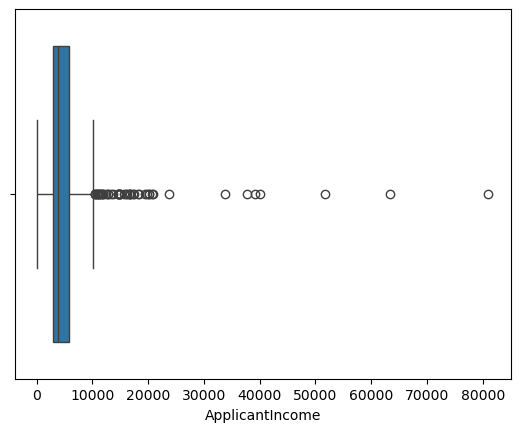

In [82]:
sns.boxplot(x='ApplicantIncome', data=loan_data)
plt.show()

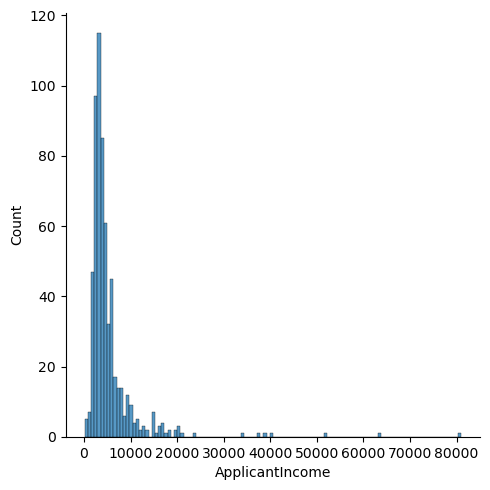

In [83]:
sns.displot(loan_data['ApplicantIncome'])
plt.show()

## Outliers Removal

In [84]:
loan_data.shape

(614, 13)

### 1. Outlier Detection and Removal Using IQR

The Interquartile Range (IQR) method is a widely used statistical technique to detect and remove outliers in a dataset. It is based on the distribution of data and identifies values that fall outside a calculated range.

#### Steps for Using the IQR Method

1. **Calculate the Quartiles**  
   - Compute the 25th percentile (Q1) and the 75th percentile (Q3) for the dataset.  
   - Q1 represents the median of the lower half of the data, and Q3 represents the median of the upper half.

2. **Determine the IQR**  
   - IQR is calculated as the difference between Q3 and Q1:  
     $$ IQR = Q3 - Q1 $$  
   - This measures the spread of the middle 50% of the data.

3. **Define the Range for Outliers**  
   - Compute the lower and upper bounds using the IQR:  
     - Lower Bound: $$ Q1 - 1.5 \times IQR $$  
     - Upper Bound: $$ Q3 + 1.5 \times IQR $$  
   - Data points lying outside these bounds are considered outliers.

4. **Filter Out Outliers**  
   - Identify data points within the acceptable range (between the lower and upper bounds).  
   - Remove rows with values exceeding the bounds or create a new dataset without the outliers.

#### Example Scenario
In this approach:
- The **`CoapplicantIncome`** column of a loan dataset is analyzed for outliers.  
- Quartiles (Q1 and Q3) are calculated, and the IQR is determined.  
- Minimum and maximum bounds are computed based on the IQR.  
- A new dataset is created, excluding values in the **`CoapplicantIncome`** column that exceed the maximum range.

#### Considerations
- IQR is robust to extreme values as it focuses on the middle 50% of the data.  
- This method assumes that the data follows a relatively symmetric distribution. For highly skewed datasets, additional transformations or domain-specific thresholds may be required.  

Using the IQR method ensures that outliers are systematically identified and removed, improving data quality for further analysis.


In [85]:
q1 = loan_data['CoapplicantIncome'].quantile(0.25)
q3 = loan_data['CoapplicantIncome'].quantile(0.75)

IQR = q3 - q1
IQR 

2297.25

In [86]:
min_range = q1 - (1.5*IQR)
max_range = q3 + (1.5*IQR)

min_range, max_range

(-3445.875, 5743.125)

In [87]:
min_range = max(loan_data['CoapplicantIncome'].min(), min_range)

min_range

0.0

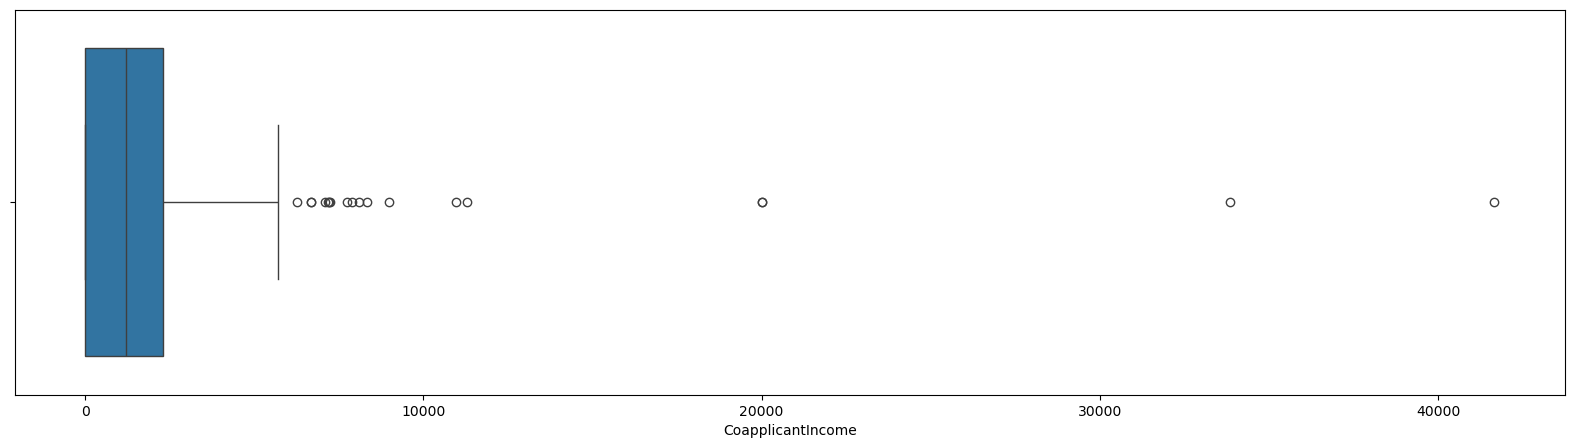

In [88]:
plt.figure(figsize=(20,5))
sns.boxplot(x='CoapplicantIncome', data=loan_data)
plt.show()

In [89]:
new_loan_data = loan_data[loan_data['CoapplicantIncome']<=max_range]

In [90]:
loan_data.shape, new_loan_data.shape

((614, 13), (596, 13))

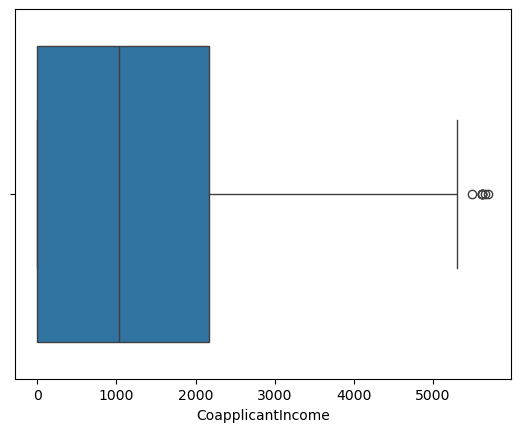

In [91]:
sns.boxplot(x='CoapplicantIncome', data=new_loan_data)
plt.show()

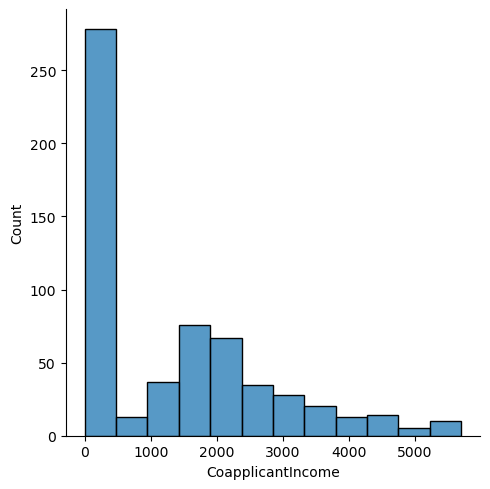

In [92]:
sns.displot(new_loan_data['CoapplicantIncome'])
plt.show()

## 2. Outlier Detection and Removal Using Direct Method and Z-Score

#### 2.1 Direct Method
The direct method identifies outliers based on the assumption that the data follows a normal distribution. It uses the mean and standard deviation to define the acceptable range for values.

**Steps for the Direct Method**:
1. **Define the Range**  
   - Calculate the acceptable range as:  
     $$ \text{Lower Bound} = \text{Mean} - (3 \times \text{Standard Deviation}) $$  
     $$ \text{Upper Bound} = \text{Mean} + (3 \times \text{Standard Deviation}) $$  
   - This range includes approximately 99.7% of the data if the distribution is normal.

2. **Filter Outliers**  
   - Retain data points within the computed range and remove the rest.

3. **Visualization**  
   - Use a boxplot to confirm that the remaining data no longer contains outliers.

**Considerations**:
- This method is effective for normally distributed data but may not work well for highly skewed distributions.  
- Extreme outliers can influence the mean and standard deviation, potentially distorting the calculated range.

---

#### 2.2 Z-Score Method
The Z-Score method standardizes data points by measuring how many standard deviations each value is from the mean. It is useful for identifying outliers in normally distributed data.

**Steps for the Z-Score Method**:
1. **Calculate the Z-Score**  
   - Compute the Z-Score for each data point:  
     $$ Z = \frac{X - \text{Mean}}{\text{Standard Deviation}} $$  
   - The Z-Score quantifies the relative position of a value within the dataset.

2. **Define Threshold**  
   - Commonly, data points with a Z-Score greater than 3 (or less than -3) are considered outliers.

3. **Filter Outliers**  
   - Retain data points with a Z-Score below the threshold, and exclude the rest.

4. **Visualization**  
   - Use a boxplot to visualize the data after removing outliers.

**Considerations**:
- The Z-Score method is sensitive to outliers as the mean and standard deviation are influenced by extreme values.  
- Works best for data with a symmetric, bell-shaped distribution.

Both methods help clean the dataset by removing extreme values, improving the accuracy and reliability of subsequent analyses.


In [93]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


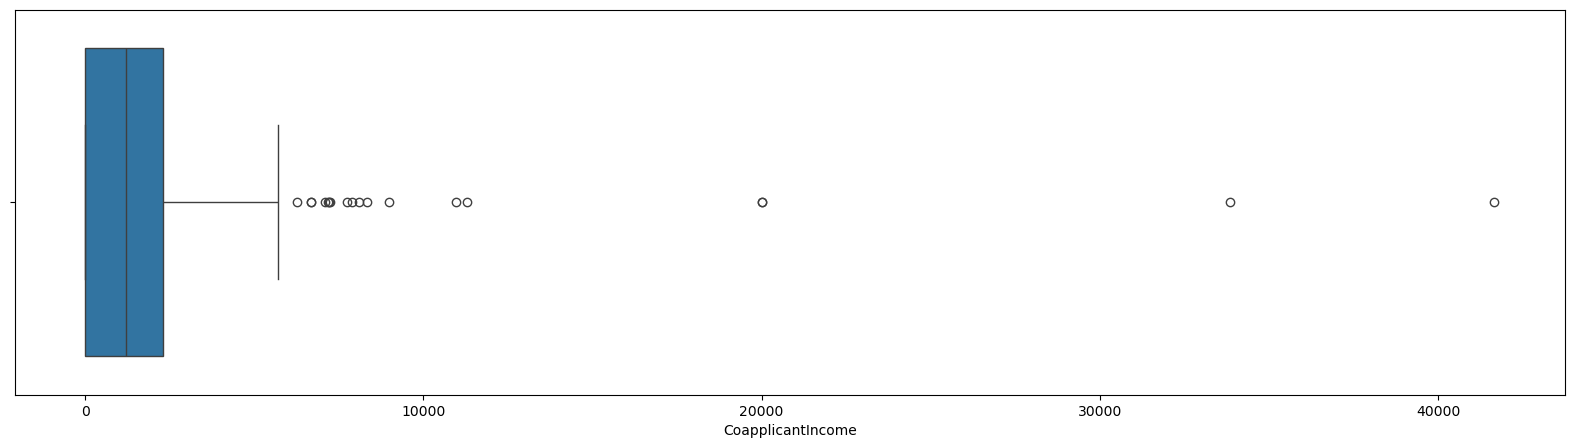

In [94]:
plt.figure(figsize=(20,5))
sns.boxplot(x= 'CoapplicantIncome', data = loan_data)
plt.show()

In [95]:
loan_data['CoapplicantIncome'].isnull().sum()

0

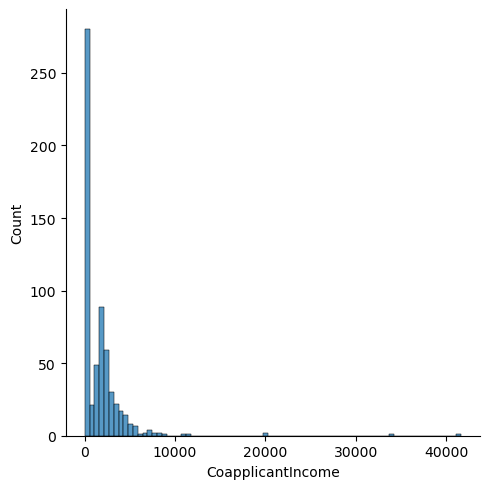

In [96]:
sns.displot(loan_data['CoapplicantIncome'])
plt.show()

### 2.1 Direct Method

In [97]:
min_range = loan_data['CoapplicantIncome'].mean() - (3* loan_data['CoapplicantIncome'].std())
max_range = loan_data['CoapplicantIncome'].mean() + (3* loan_data['CoapplicantIncome'].std())

min_range, max_range

(-7157.499309645475, 10399.990905699677)

In [98]:
new_data = loan_data[loan_data['CoapplicantIncome']<=max_range]
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [99]:
loan_data.shape, new_data.shape

((614, 13), (608, 13))

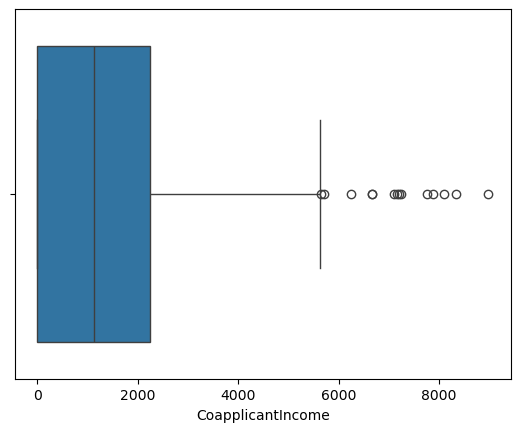

In [100]:
sns.boxplot(x= 'CoapplicantIncome', data = new_data)
plt.show()

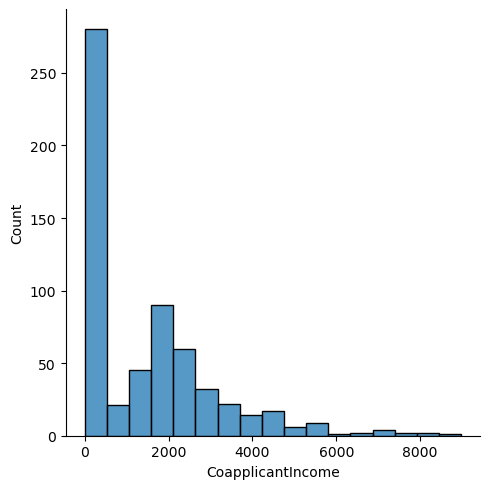

In [101]:
sns.displot(new_data['CoapplicantIncome'])
plt.show()

### 2.2 Using Z-Score

In [102]:
z_score = (loan_data['CoapplicantIncome'] - loan_data['CoapplicantIncome'].mean()) / loan_data['CoapplicantIncome'].std()

z_score


0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [103]:
loan_data['z_score'] = z_score
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,-0.554036


In [104]:
new_data = loan_data[loan_data['z_score']<3]

loan_data.shape, new_data.shape

((614, 14), (608, 14))

#### **Note :** Both Direct method and Z-Score has the same functionalty

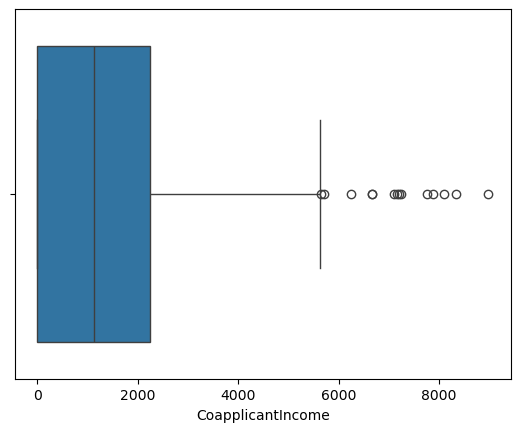

In [105]:
sns.boxplot(x= 'CoapplicantIncome', data = new_data)
plt.show()

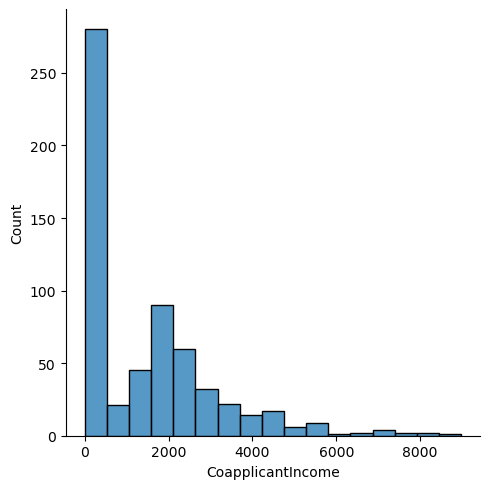

In [106]:
sns.displot(new_data['CoapplicantIncome'])
plt.show()